In [65]:
setwd('/import/DB/zhang//data')

In [66]:
meta = readRDS('copykatres.rds')

In [78]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [80]:
bad1 = meta %>% dplyr::filter(copykat.tumor.pred %in% c('tumor cluster 1','tumor cluster 2','tumor cluster 3')) %>% rownames()

In [84]:
bad2 = infercnv %>%  filter(Annotation.Group == 2) %>%  rownames()

In [85]:
intersect(bad1,bad2)

character(0)

In [86]:
head(bad1)

[1] "ATGTCCCTCATAGCAC-1_3" "TAAGCCAGTTAAGGAT-1_3" "CAACAACAGGACGGAG-1_4"
[4] "AACAGGGTCCTGTACC-1_5" "TGAGCATCATGTGCCG-1_5" "TTGGGCGGTAACGATA-1_5"

In [87]:
head(bad2)

[1] "CCTCTAGCATCCCGTT-1_6" "TTCCTAAAGATACTGA-3_1" "GGAATGGAGAGTCTTC-2_1"
[4] "TACTTCATCGCCGAGT-3_1" "GTCCCATAGCCACTCG-3_1" "GTATTTCCAGTAGTGG-3_1"

In [67]:
sce = readRDS('OS.final.rds')

In [68]:
library(Seurat)

In [69]:
sce1 = AddMetaData(sce,meta)

In [70]:
Idents(sce1) = 'copykat.tumor.pred'

In [71]:
options(repr.plot.height = 9,repr.plot.width = 8)

In [74]:
unique(sce1$copykat.tumor.pred)

[1] "normal"          NA                "tumor cluster 1" "tumor cluster 2"
[5] "tumor cluster 3"

In [23]:
Idents(sce1) = 'copykat.tumor.pred'

In [24]:
sce1 = subset(sce1,idents = c('normal','tumor cluster 1','tumor cluster 2','tumor cluster 3'))

In [27]:
table(sce1$copykat.tumor.pred)


aneuploid   diploid 
     4037     15479 

In [25]:
sce1$copykat.tumor.pred = ifelse(sce1$copykat.tumor.pred == 'normal','diploid','aneuploid')

In [32]:
Idents(sce1) = 'copykat.tumor.pred'

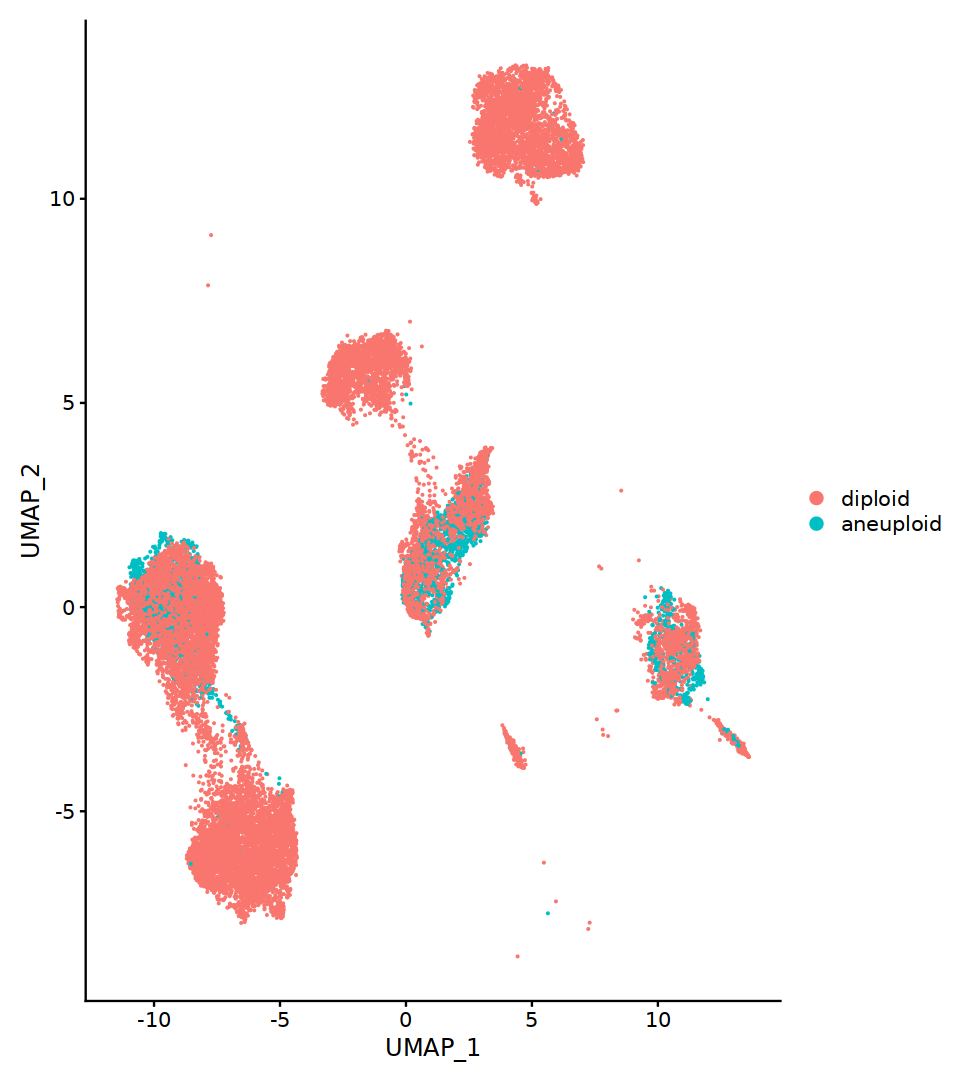

In [33]:
DimPlot(sce1)

In [34]:
table(sce1$copykat.tumor.pred,sce1$group)

           
               OS control
  aneuploid  4033       4
  diploid   13454    2025

In [36]:
saveRDS(sce1,file = 'OS.add.copykat.rds')